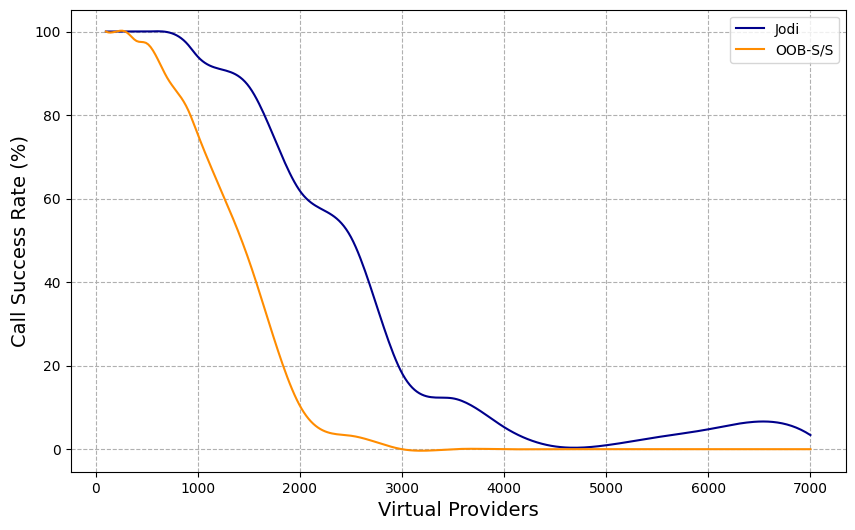

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

oobss = 'oob-s/s'
jodi = 'jodi'

# Load the CSV file
df = pd.read_csv("../k6-sr.csv")

# Define custom colors for each protocol
colors = {jodi: "darkblue", oobss: "darkorange"}

# Create figure
plt.figure(figsize=(10, 6))

for protocol in df["Protocol"].unique():
    subset = df[df["Protocol"] == protocol]
    x = subset["VUs"]
    y = subset["Success-Rate"]
    proto = protocol.title() if protocol == jodi else protocol.upper()

    # Ensure enough points for spline interpolation
    if len(x) > 2:
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
        plt.plot(x_smooth, y_smooth, linestyle="-", color=colors[protocol], label=proto)
    else:
        plt.plot(x, y, linestyle="-", color=colors[protocol], label=proto)

    # Removed marker plot
    # plt.scatter(x, y, marker="o", color=colors[protocol], s=15, zorder=3)

plt.xlabel("Virtual Providers", fontsize=14)
plt.ylabel("Call Success Rate (%)", fontsize=14)
# plt.title("Calls Processed as Call Rates increase", fontsize=14, fontweight='bold', pad=15)
plt.legend()

# Make grid lines dashed and move them behind the lines
plt.grid(True, linestyle='--', zorder=1)

# Save the figure as a high-resolution PDF
plt.savefig("../charts/throughput.pdf", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
